<a href="https://colab.research.google.com/github/ARU-Bioinformatics/Lab_techniques_for_bioinformatics/blob/main/week_8/MOD006195_CT_analysis_for_SARS_CoV_2_qPCR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOD006195** CT analysis for SARS-CoV-2 qPCR data

##Get the computer ready

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Import your data

In [ ]:
filename = "qpcr_data.csv"
data = pd.read_csv(filename)

## Make an amplification plot and choose threshold

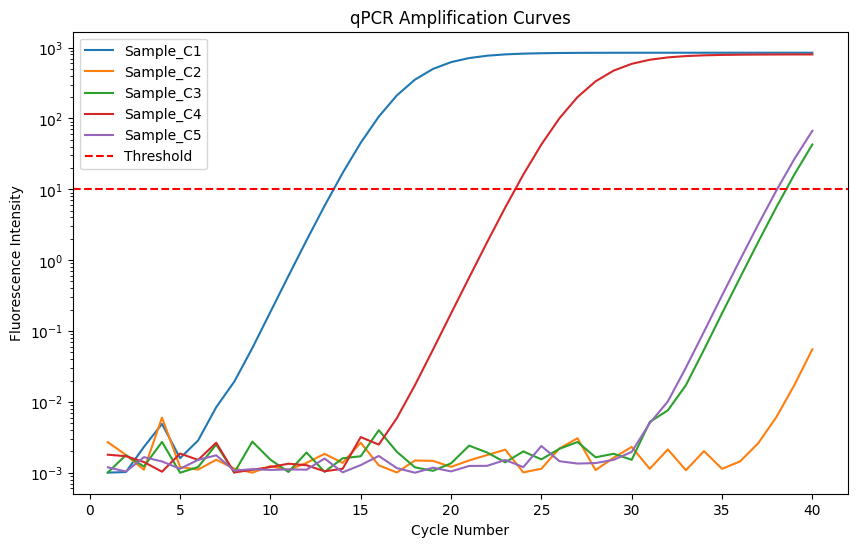

In [ ]:
def plot_qpcr_curves(data):
    """
    Plot qPCR amplification curves from CSV data.
    """
    plt.figure(figsize=(10, 6))

    for sample_id in data['SampleID'].unique():
        sample_data = data[data['SampleID'] == sample_id]
        plt.plot(sample_data['Cycle'], sample_data['Fluorescence'], label=sample_id)

    plt.axhline(y=10, color='r', linestyle='--', label='Threshold')
    plt.yscale('log')
    plt.title('qPCR Amplification Curves')
    plt.xlabel('Cycle Number')
    plt.ylabel('Fluorescence Intensity')
    plt.legend()
    plt.show()

# Plot data from the saved CSV
plot_qpcr_curves(data)

##Set your threshold

In [ ]:
# User-defined threshold for CT and efficiency calculation
threshold = 10

## Caclulate the CT values and efficiency

In [ ]:
def calculate_metrics_around_threshold(data, threshold):
    metrics = []

    for sample_id in data['SampleID'].unique():
        sample_data = data[data['SampleID'] == sample_id].sort_values(by='Cycle')

        # Identify the cycles immediately before and after the fluorescence exceeds the threshold
        below_threshold = sample_data[sample_data['Fluorescence'] <= threshold]
        above_threshold = sample_data[sample_data['Fluorescence'] > threshold]

        if not above_threshold.empty and not below_threshold.empty:
            cycle_below = below_threshold.iloc[-1]['Cycle']
            fluorescence_below = below_threshold.iloc[-1]['Fluorescence']
            cycle_above = above_threshold.iloc[0]['Cycle']
            fluorescence_above = above_threshold.iloc[0]['Fluorescence']

            # Linear interpolation for CT
            ct = cycle_below + ((threshold - fluorescence_below) / (fluorescence_above - fluorescence_below)) * (cycle_above - cycle_below)

            # Efficiency calculation using log-transformed fluorescence around threshold
            log_F_below = np.log(fluorescence_below)
            log_F_above = np.log(fluorescence_above)
            slope = (log_F_above - log_F_below) / (cycle_above - cycle_below)
            efficiency = np.exp(slope) - 1

            metrics.append({'SampleID': sample_id, 'Efficiency': efficiency, 'CT': ct})
        else:
            metrics.append({'SampleID': sample_id, 'Efficiency': np.nan, 'CT': np.nan})

    return pd.DataFrame(metrics)

# Calculate metrics around the threshold
results_df = calculate_metrics_around_threshold(data, threshold)
print(results_df)

# Save the updated DataFrame
results_df.to_csv('updated_qpcr_results.csv', index=False)
print("Updated results saved to 'updated_qpcr_results.csv'.")


    SampleID  Efficiency         CT
0  Sample_C1    1.907970  13.372219
1  Sample_C2         NaN        NaN
2  Sample_C3    1.908358  38.422675
3  Sample_C4    1.908174  23.422599
4  Sample_C5    1.796013  38.027901
Updated results saved to 'updated_qpcr_results.csv'.


Questions:

*   What threshold did you choose and why?
*   Which of your samples contained viral RNA?

